In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [302]:
# Carregar o dataset enviado
file_path = "/content/drive/MyDrive/Residência - IA/ML/6 - Indicacao Viagens/dataset_viagens_brasil.csv"
df = pd.read_csv(file_path)

In [303]:
df.head()

,Idade,Cidade_Origem,Custo_Desejado,Prefere_Praia,Prefere_Natureza,Prefere_Cultura,Prefere_Festas,Prefere_Gastronomia,Prefere_Compras,Cidade_Destino
0,23.0,Campo Grande,9000.0,4,3.0,1,5.0,1.0,3,Porto Seguro
1,33.0,Rio Branco,NaN,4,5.0,3,5.0,5.0,5,Balneário Camboriú
2,46.0,Rio Branco,2900.0,5,4.0,5,4.0,2.0,2,Porto Seguro
3,20.0,São Luís,2900.0,5,3.0,4,3.0,5.0,4,Porto Seguro
4,37.0,Teresina,1700.0,3,3.0,4,2.0,1.0,1,Fernando de Noronha


In [304]:
df.shape

(20000, 10)

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                19503 non-null  float64
 1   Cidade_Origem        20000 non-null  object 
 2   Custo_Desejado       19503 non-null  float64
 3   Prefere_Praia        20000 non-null  object 
 4   Prefere_Natureza     19600 non-null  float64
 5   Prefere_Cultura      20000 non-null  object 
 6   Prefere_Festas       19600 non-null  float64
 7   Prefere_Gastronomia  19600 non-null  float64
 8   Prefere_Compras      20000 non-null  object 
 9   Cidade_Destino       20000 non-null  object 
dtypes: float64(5), object(5)
memory usage: 1.5+ MB


In [306]:

colunas_numericas = ['Idade', 'Custo_Desejado', 'Prefere_Praia', 'Prefere_Natureza',
                     'Prefere_Cultura', 'Prefere_Festas', 'Prefere_Gastronomia', 'Prefere_Compras']

for coluna in colunas_numericas:
    if coluna in df.columns:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce').astype('float64')

# Verificar os tipos resultantes
print(df.dtypes)

Idade                  float64
Cidade_Origem           object
Custo_Desejado         float64
Prefere_Praia          float64
Prefere_Natureza       float64
Prefere_Cultura        float64
Prefere_Festas         float64
Prefere_Gastronomia    float64
Prefere_Compras        float64
Cidade_Destino          object
dtype: object


In [307]:
df.isnull().sum()

,0
Idade,497
Cidade_Origem,0
Custo_Desejado,497
Prefere_Praia,400
Prefere_Natureza,400
Prefere_Cultura,400
Prefere_Festas,400
Prefere_Gastronomia,400
Prefere_Compras,400
Cidade_Destino,0


In [308]:
df = df.dropna()

df.shape

(16852, 10)

In [309]:
df.duplicated().sum()

np.int64(0)

In [310]:
df['Cidade_Destino'].unique()

array(['Porto Seguro', 'Fernando de Noronha', 'Balneário Camboriú',
       'João Pessoa', 'Jericoacoara', 'Macapá', 'Campo Grande', 'Paraty',
       'Gramado', 'Aracaju', 'Campos do Jordão', 'Porto Alegre',
       'Petrópolis', 'Boa Vista', 'Belém', 'Foz do Iguaçu', 'Fortaleza',
       'Belo Horizonte', 'São Paulo', 'Tiradentes', 'Rio Branco',
       'Cuiabá', 'Ouro Preto', 'Vitória', 'Salvador'], dtype=object)

In [311]:
df["Cidade_Destino"].value_counts()

,count
Cidade_Destino,
Macapá,3308
Porto Seguro,2909
Paraty,2485
Balneário Camboriú,1616
João Pessoa,1485
Jericoacoara,1406
Aracaju,1199
Campo Grande,818
Gramado,530


Agrupamento de Cidades Destino menores que 100 dados

In [312]:
limite = 100

contagem_cidades = df["Cidade_Destino"].value_counts()

cidades_para_agrupar = contagem_cidades[contagem_cidades < limite].index

mapeamento = {}
for cidade in cidades_para_agrupar:
    mapeamento[cidade] = 'Outras cidades'

df['Cidade_Destino'] = df['Cidade_Destino'].replace(mapeamento)

# Verificar o resultado
print("Agrupamento concluído!")
print("\nDistribuição atualizada de Cidade_Destino:")
print(df['Cidade_Destino'].value_counts().sort_values(ascending=False))

print(f"\nTotal de categorias: {len(df['Cidade_Destino'].value_counts())}")

Agrupamento concluído!

Distribuição atualizada de Cidade_Destino:
Cidade_Destino
Macapá                 3308
Porto Seguro           2909
Paraty                 2485
Balneário Camboriú     1616
João Pessoa            1485
Jericoacoara           1406
Aracaju                1199
Campo Grande            818
Gramado                 530
Fernando de Noronha     416
Outras cidades          351
Campos do Jordão        329
Name: count, dtype: int64

Total de categorias: 12


In [313]:
df["Cidade_Origem"].value_counts()

,count
Cidade_Origem,
João Pessoa,678
Belo Horizonte,665
Curitiba,662
Manaus,649
Porto Velho,647
Goiânia,644
Macapá,639
São Luís,639
Rio de Janeiro,637


In [314]:
df['Idade'].unique()

array([ 23.,  46.,  20.,  37.,  53.,  36.,  43.,  24.,  50.,  57.,  56.,
        35., 190.,  28.,  45.,  67.,  40.,  48.,  47.,  59.,  52.,  65.,
        66.,  19.,  18.,  29.,  54.,  49.,  26.,  58.,  33.,  41.,  69.,
        55.,  42.,  63.,  21.,  31.,  38.,  25.,  34.,  39.,  62.,  44.,
        22.,  61.,  70.,  64.,  60.,  30.,  68.,  32.,  51.,  27.])

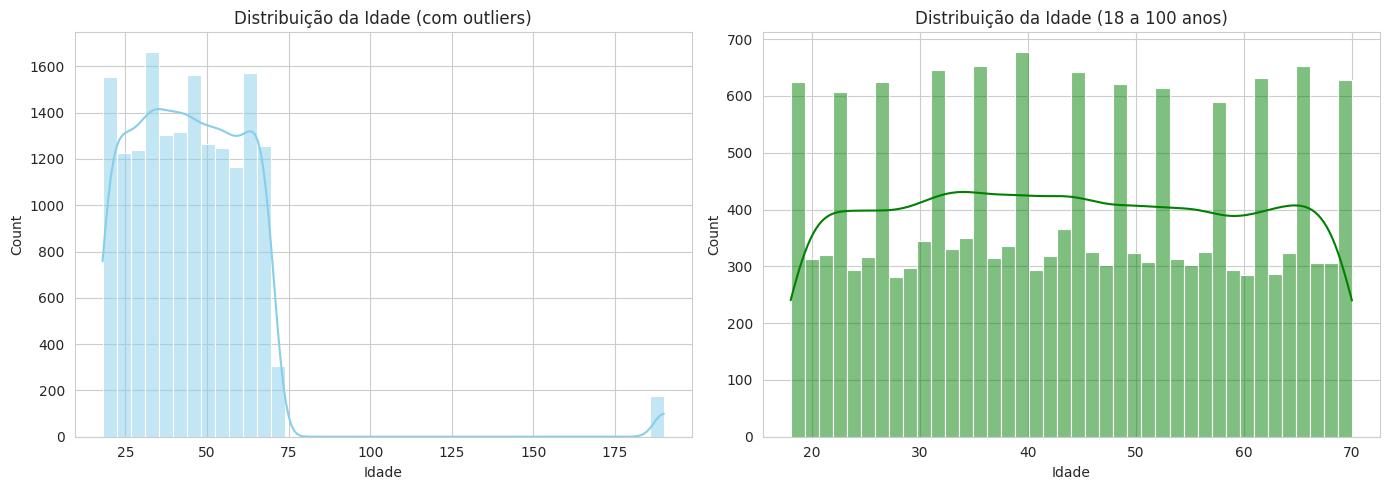

,Idade
count,16852.000000
mean,45.407251
std,21.141427
min,18.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,190.000000


In [315]:
# Estatísticas resumidas da coluna 'Idade'
idade_desc = df['Idade'].describe()

# Filtrar dados dentro de uma faixa plausível (ex: 18 a 100 anos)
idade_filtrada = df[(df['Idade'] >= 18) & (df['Idade'] <= 100)]

# Gráficos para análise de idade (com e sem outliers)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma original (com outliers)
sns.histplot(df['Idade'], bins=40, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribuição da Idade (com outliers)")

# Histograma filtrado (sem outliers)
sns.histplot(idade_filtrada['Idade'], bins=40, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribuição da Idade (18 a 100 anos)")

plt.tight_layout()
plt.show()

idade_desc


In [316]:
# Excluir idades acima de 100
df = df[df["Idade"] <= 100]

df.shape

(16678, 10)

In [317]:
def remove_outliers_iqr(data, cols):
    for col in cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inferior = Q1 - 1.5 * IQR
        lim_superior = Q3 + 1.5 * IQR
        data = data[(data[col] >= lim_inferior) & (data[col] <= lim_superior)]
    return data

df = remove_outliers_iqr(df, num_cols)


In [318]:
df['Cidade_Destino'].unique()

array(['Porto Seguro', 'Fernando de Noronha', 'Balneário Camboriú',
       'João Pessoa', 'Jericoacoara', 'Macapá', 'Campo Grande', 'Paraty',
       'Gramado', 'Aracaju', 'Campos do Jordão', 'Outras cidades'],
      dtype=object)

In [319]:
df

,Idade,Cidade_Origem,Custo_Desejado,Prefere_Praia,Prefere_Natureza,Prefere_Cultura,Prefere_Festas,Prefere_Gastronomia,Prefere_Compras,Cidade_Destino
0,23.0,Campo Grande,9000.0,4.0,3.0,1.0,5.0,1.0,3.0,Porto Seguro
2,46.0,Rio Branco,2900.0,5.0,4.0,5.0,4.0,2.0,2.0,Porto Seguro
3,20.0,São Luís,2900.0,5.0,3.0,4.0,3.0,5.0,4.0,Porto Seguro
4,37.0,Teresina,1700.0,3.0,3.0,4.0,2.0,1.0,1.0,Fernando de Noronha
5,53.0,João Pessoa,7100.0,5.0,1.0,2.0,3.0,4.0,2.0,Balneário Camboriú
...,...,...,...,...,...,...,...,...,...,...
19995,27.0,Rio Branco,3800.0,3.0,1.0,1.0,3.0,1.0,1.0,Macapá
19996,52.0,Fortaleza,6100.0,3.0,2.0,2.0,2.0,3.0,2.0,Jericoacoara
19997,69.0,Aracaju,3100.0,4.0,2.0,2.0,4.0,3.0,3.0,Paraty
19998,69.0,Fortaleza,2500.0,5.0,2.0,4.0,1.0,1.0,5.0,Jericoacoara


BALANCEAMENTO

In [320]:
# Função para balanceamento direto
def balancear_dataframe(df, coluna_alvo, metodo='mediana'):


    # Calcular tamanho alvo
    contagens = df[coluna_alvo].value_counts()

    if metodo == 'minimo':
        tamanho_alvo = contagens.min()  # Usar tamanho da menor classe
    elif metodo == 'mediana':
        tamanho_alvo = int(contagens.median())  # Usar mediana
    elif metodo == 'customizado':
        # Um valor balanceado entre min e max
        tamanho_alvo = int((contagens.min() + contagens.max()) / 2)
    else:
        tamanho_alvo = int(contagens.median())

    print(f"\nTamanho alvo por classe: {tamanho_alvo}")

    # Balancear cada classe
    dataframes_balanceados = []

    for cidade in df[coluna_alvo].unique():
        df_cidade = df[df[coluna_alvo] == cidade]
        n_amostras = len(df_cidade)

        if n_amostras > tamanho_alvo:
            # Reduzir (undersampling) - pegar amostras aleatórias
            df_balanceado = df_cidade.sample(n=tamanho_alvo, random_state=42)
            print(f"✓ {cidade}: {n_amostras} → {tamanho_alvo} (reduzido)")
        else:
            # Aumentar (oversampling) - repetir amostras
            df_balanceado = df_cidade.sample(n=tamanho_alvo, replace=True, random_state=42)
            print(f"✓ {cidade}: {n_amostras} → {tamanho_alvo} (aumentado)")

        dataframes_balanceados.append(df_balanceado)

    # Combinar todos os DataFrames balanceados
    df_final = pd.concat(dataframes_balanceados, ignore_index=True)

    return df_final

# APLICAR BALANCEAMENTO DIRETAMENTE
print("\n=== APLICANDO BALANCEAMENTO ===")
df_balanced = balancear_dataframe(df, 'Cidade_Destino', metodo='mediana')

# Verificar resultados
print("\n=== RESULTADO DO BALANCEAMENTO ===")
print(df_balanced['Cidade_Destino'].value_counts())
print(f"\nTotal de registros após balanceamento: {len(df_balanced)}")


=== APLICANDO BALANCEAMENTO ===

Tamanho alvo por classe: 1240
✓ Porto Seguro: 2782 → 1240 (reduzido)
✓ Fernando de Noronha: 401 → 1240 (aumentado)
✓ Balneário Camboriú: 1479 → 1240 (reduzido)
✓ João Pessoa: 1426 → 1240 (reduzido)
✓ Jericoacoara: 1325 → 1240 (reduzido)
✓ Macapá: 3146 → 1240 (reduzido)
✓ Campo Grande: 778 → 1240 (aumentado)
✓ Paraty: 2356 → 1240 (reduzido)
✓ Gramado: 501 → 1240 (aumentado)
✓ Aracaju: 1155 → 1240 (aumentado)
✓ Campos do Jordão: 310 → 1240 (aumentado)
✓ Outras cidades: 335 → 1240 (aumentado)

=== RESULTADO DO BALANCEAMENTO ===
Cidade_Destino
Porto Seguro           1240
Fernando de Noronha    1240
Balneário Camboriú     1240
João Pessoa            1240
Jericoacoara           1240
Macapá                 1240
Campo Grande           1240
Paraty                 1240
Gramado                1240
Aracaju                1240
Campos do Jordão       1240
Outras cidades         1240
Name: count, dtype: int64

Total de registros após balanceamento: 14880


In [321]:
df = df_balanced


DataFrame 'df' encontrado. Iniciando o pipeline simplificado...

--- ETAPA 1: Codificação de Variáveis (Label Encoding) ---
Codificação de variáveis categóricas concluída.

Divisão dos dados concluída:
Treino:    (10416, 9), (10416,)
Validação: (2232, 9), (2232,)
Teste:     (2232, 9), (2232,)

Normalização (StandardScaler) aplicada.

--- ETAPA 2: Treinamento com 'class_weight' para balanceamento ---
--- RandomForest ---
Acurácia no Teste: 0.5175
F1-Score (Weighted) no Teste: 0.4740

--- DecisionTree ---
Acurácia no Teste: 0.5130
F1-Score (Weighted) no Teste: 0.4893

--- XGBoost ---
Acurácia no Teste: 0.5130
F1-Score (Weighted) no Teste: 0.4769

--- LogisticRegression ---
Acurácia no Teste: 0.3038
F1-Score (Weighted) no Teste: 0.2793

--- KNN ---
Acurácia no Teste: 0.3970
F1-Score (Weighted) no Teste: 0.3552

--- SVC ---
Acurácia no Teste: 0.3790
F1-Score (Weighted) no Teste: 0.3361


--- RESULTADO FINAL: Comparação Consolidada dos Modelos ---

                    acuracia_teste  f1_sco

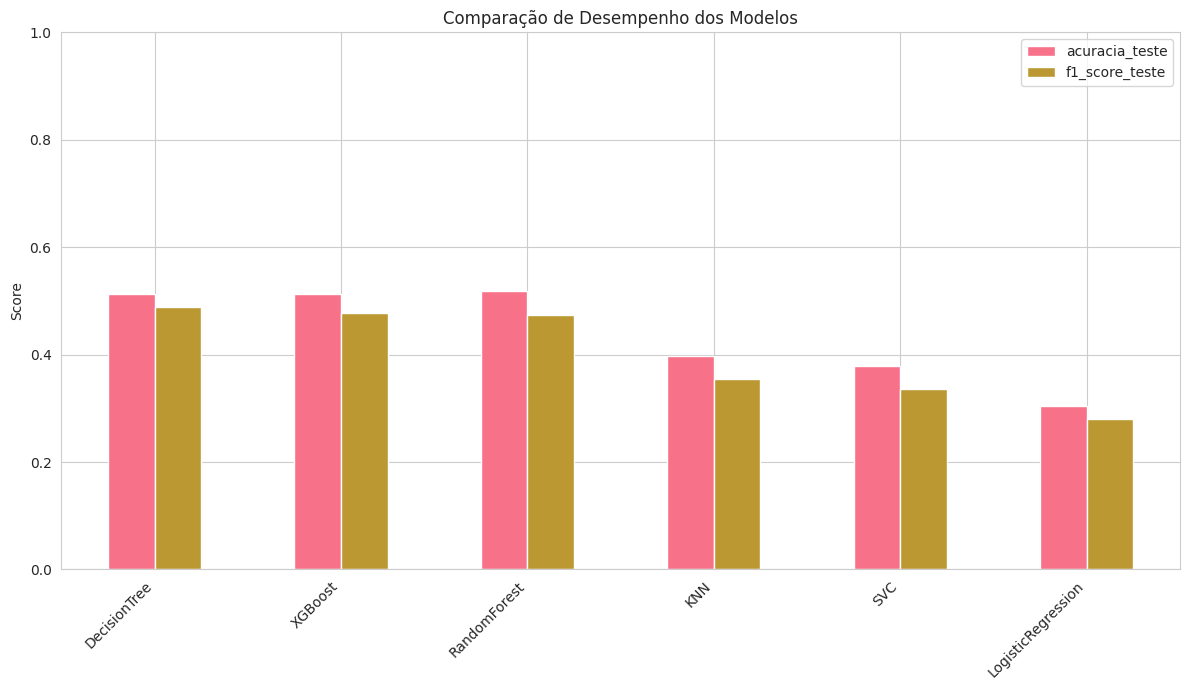

In [322]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# BLOCO 1: IMPORTAÇÕES DAS BIBLIOTECAS
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import warnings

# Importação dos modelos de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Ignorar avisos para uma saída mais limpa
warnings.filterwarnings('ignore')

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# BLOCO 2: FUNÇÕES AUXILIARES
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

def exibir_resultado_clf(nome_modelo, modelo, X_test, y_test):
    """Exibe as métricas de avaliação para um modelo de classificação."""
    y_pred = modelo.predict(X_test)
    acuracia = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"--- {nome_modelo} ---")
    print(f"Acurácia no Teste: {acuracia:.4f}")
    print(f"F1-Score (Weighted) no Teste: {f1:.4f}\n")

    return {'acuracia_teste': acuracia, 'f1_score_teste': f1}

def codificar_categoricas(df, colunas_categoricas):
    """Aplica Label Encoding em colunas categóricas."""
    df_encoded = df.copy()
    for col in colunas_categoricas:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    print("Codificação de variáveis categóricas concluída.")
    return df_encoded

def dividir_dados(df):
    """Divide os dados em treino, validação e teste de forma estratificada."""
    X = df.drop(columns=['Cidade_Destino'])
    y = df['Cidade_Destino']

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.30, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
    )

    print("\nDivisão dos dados concluída:")
    print(f"Treino:    {X_train.shape}, {y_train.shape}")
    print(f"Validação: {X_val.shape}, {y_val.shape}")
    print(f"Teste:     {X_test.shape}, {y_test.shape}")

    return X_train, X_val, X_test, y_train, y_val, y_test

def normalizar_dados(X_train, X_val, X_test):
    """Aplica StandardScaler aos dados (features)."""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    print("\nNormalização (StandardScaler) aplicada.")
    return X_train_scaled, X_val_scaled, X_test_scaled

# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# BLOCO 3: EXECUÇÃO PRINCIPAL
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# !!! PASSO 1: GARANTA QUE SEU DATAFRAME 'df' JÁ ESTÁ PRONTO E CARREGADO !!!
# O DataFrame já deve conter as 12 classes finais na coluna 'Cidade_Destino'

if 'df' in locals() and isinstance(df, pd.DataFrame):
    print("DataFrame 'df' encontrado. Iniciando o pipeline simplificado...")

    df_processado = df.copy()

    # 1. CODIFICAR VARIÁVEIS CATEGÓRICAS
    print("\n--- ETAPA 1: Codificação de Variáveis (Label Encoding) ---")
    colunas_obj = df_processado.select_dtypes(include="object").columns.tolist()
    df_encoded = codificar_categoricas(df_processado, colunas_obj)

    # 2. DIVIDIR OS DADOS
    X_train, X_val, X_test, y_train, y_val, y_test = dividir_dados(df_encoded)

    # 3. NORMALIZAR OS DADOS
    X_train_s, X_val_s, X_test_s = normalizar_dados(X_train, X_val, X_test)

    # 4. TREINAR E AVALIAR OS MODELOS COM BALANCEAMENTO DE CLASSES
    print("\n--- ETAPA 2: Treinamento com 'class_weight' para balanceamento ---")
    metricas = {}

    modelos = {
        "RandomForest": RandomForestClassifier(random_state=42, class_weight='balanced'),
        "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
        "KNN": KNeighborsClassifier(n_neighbors=5), # KNN não suporta class_weight
        "SVC": SVC(random_state=42, class_weight='balanced')
    }

    for nome, modelo in modelos.items():
        if nome in ["LogisticRegression", "KNN", "SVC"]:
            modelo.fit(X_train_s, y_train)
            metricas[nome] = exibir_resultado_clf(nome, modelo, X_test_s, y_test)
        else:
            modelo.fit(X_train, y_train)
            metricas[nome] = exibir_resultado_clf(nome, modelo, X_test, y_test)

    # 5. CONSOLIDAR E EXIBIR RESULTADOS
    df_resultados = pd.DataFrame(metricas).T.sort_values(by='f1_score_teste', ascending=False)
    print("\n--- RESULTADO FINAL: Comparação Consolidada dos Modelos ---\n")
    print(df_resultados)

    # 6. VISUALIZAR RESULTADOS
    df_resultados.plot(kind="bar", y=['acuracia_teste', 'f1_score_teste'], figsize=(12, 7),
                       title="Comparação de Desempenho dos Modelos", grid=True)
    plt.ylabel("Score")
    plt.ylim(0, 1.0)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

else:
    print("ERRO: O DataFrame 'df' não foi encontrado.")
    print("Por favor, carregue seus dados na variável 'df' antes de executar este script.")